<a href="https://colab.research.google.com/github/allaltune/HCSPD_2024/blob/main/Actividad_2_Modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 2 - Módulo 1

**Autor**: Walter Allaltune

**Link a repositorio GitHub**: https://github.com/allaltune/HCSPD_2024/tree/main/Semana%202

## Actividad 1

Se solicita obtener el sistema lineal en variables de estado para el equilibrio
$x=\begin{matrix}[0& 0& 0& 0]^T\end{matrix}$.

Partiendo de las ecuaciones:


\begin{equation}
\begin{cases}
& α̇=a(ϕ -α) \\
& ϕ̈  = -ω^2(ϕ-α-b⋅ u) \\
& ḣ = c⋅ α
\end{cases}
\end{equation}



Considerando: $x_1=α$, $x_2=ϕ$, $x_3=ϕ̇$ y $x_4=h$, se tiene que:

$ẋ_t=A⋅x_t+B⋅u_t$

con:

$A=\begin{bmatrix}-a& a& 0& 0\\0&0&0&0\\ω^2&-ω^2&0&0\\c&0&0&0\end{bmatrix}$

$B=\begin{bmatrix}0\\0\\ω^2b\\0\end{bmatrix}$


##Actividad 2

Considerando que:

$\omega=0.2$, $a=0.01$,$b=2$,$c=100m/s$,$Δt=10^{-3}$ y $t_s=5 s$:

In [ ]:
!apt install octave #Instala octave en el entorno de trabajo

In [10]:
%%writefile Avion_Num.m
clc;clear all;
warning('off','all');
X=-[0; 0;0;0];t_etapa=10e-3;
tF=5;
color_='r';
color='b';

u=1;
ii=0;
for t=0:t_etapa:tF
  ii=ii+1;
  x2(ii)=X(2);%Ángulo fi
  x4(ii)=X(4);%Altura
  X=modavion(t_etapa, X, u);
  acc(ii)=u;
end


t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);hold on;
plot(t,x2,color_);title('x_2 angulo phi'); hold on;
subplot(3,1,2);hold on;
plot(t,x4,color_);title('x_4 Altura');
subplot(3,1,3);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');

print(hfig1,'VarsAvion_temporal','-r300','-dpng');
save('Verificacion_Num_1Avion.mat','-v7');

Overwriting Avion_Num.m


In [11]:
%%writefile modavion.m
%Funcion modelo
function [X]=modavion(t_etapa, xant, accion)
%xant=[alfa,fi,fi_p,h]
a=0.01; b=2; c=100;
omega=0.2;
At=1e-3;
u=accion;

%xant=[alfa,fi,fi_p,h]
alfa=xant(1);
fi=xant(2);
fi_p=xant(3);
h=xant(4);
x=xant;

for ii=1:t_etapa/At
  %xp=A*x+B*u;
  alfa_p=a*(fi-alfa);
  fi_pp=(-omega^2)*(fi-alfa-b*u);
  h_p=c*alfa;
  xp=[alfa_p;fi_p;fi_pp;h_p];
  x=x+xp*At;
  fi_p=xp(2);
  alfa=x(1);
  fi=x(2);
  fi_p=x(3);
  h=x(4);
end
X=[x]; %

Overwriting modavion.m


In [13]:
# -W : no window system
!octave -W Avion_Num.m
# import scipy.io
# mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

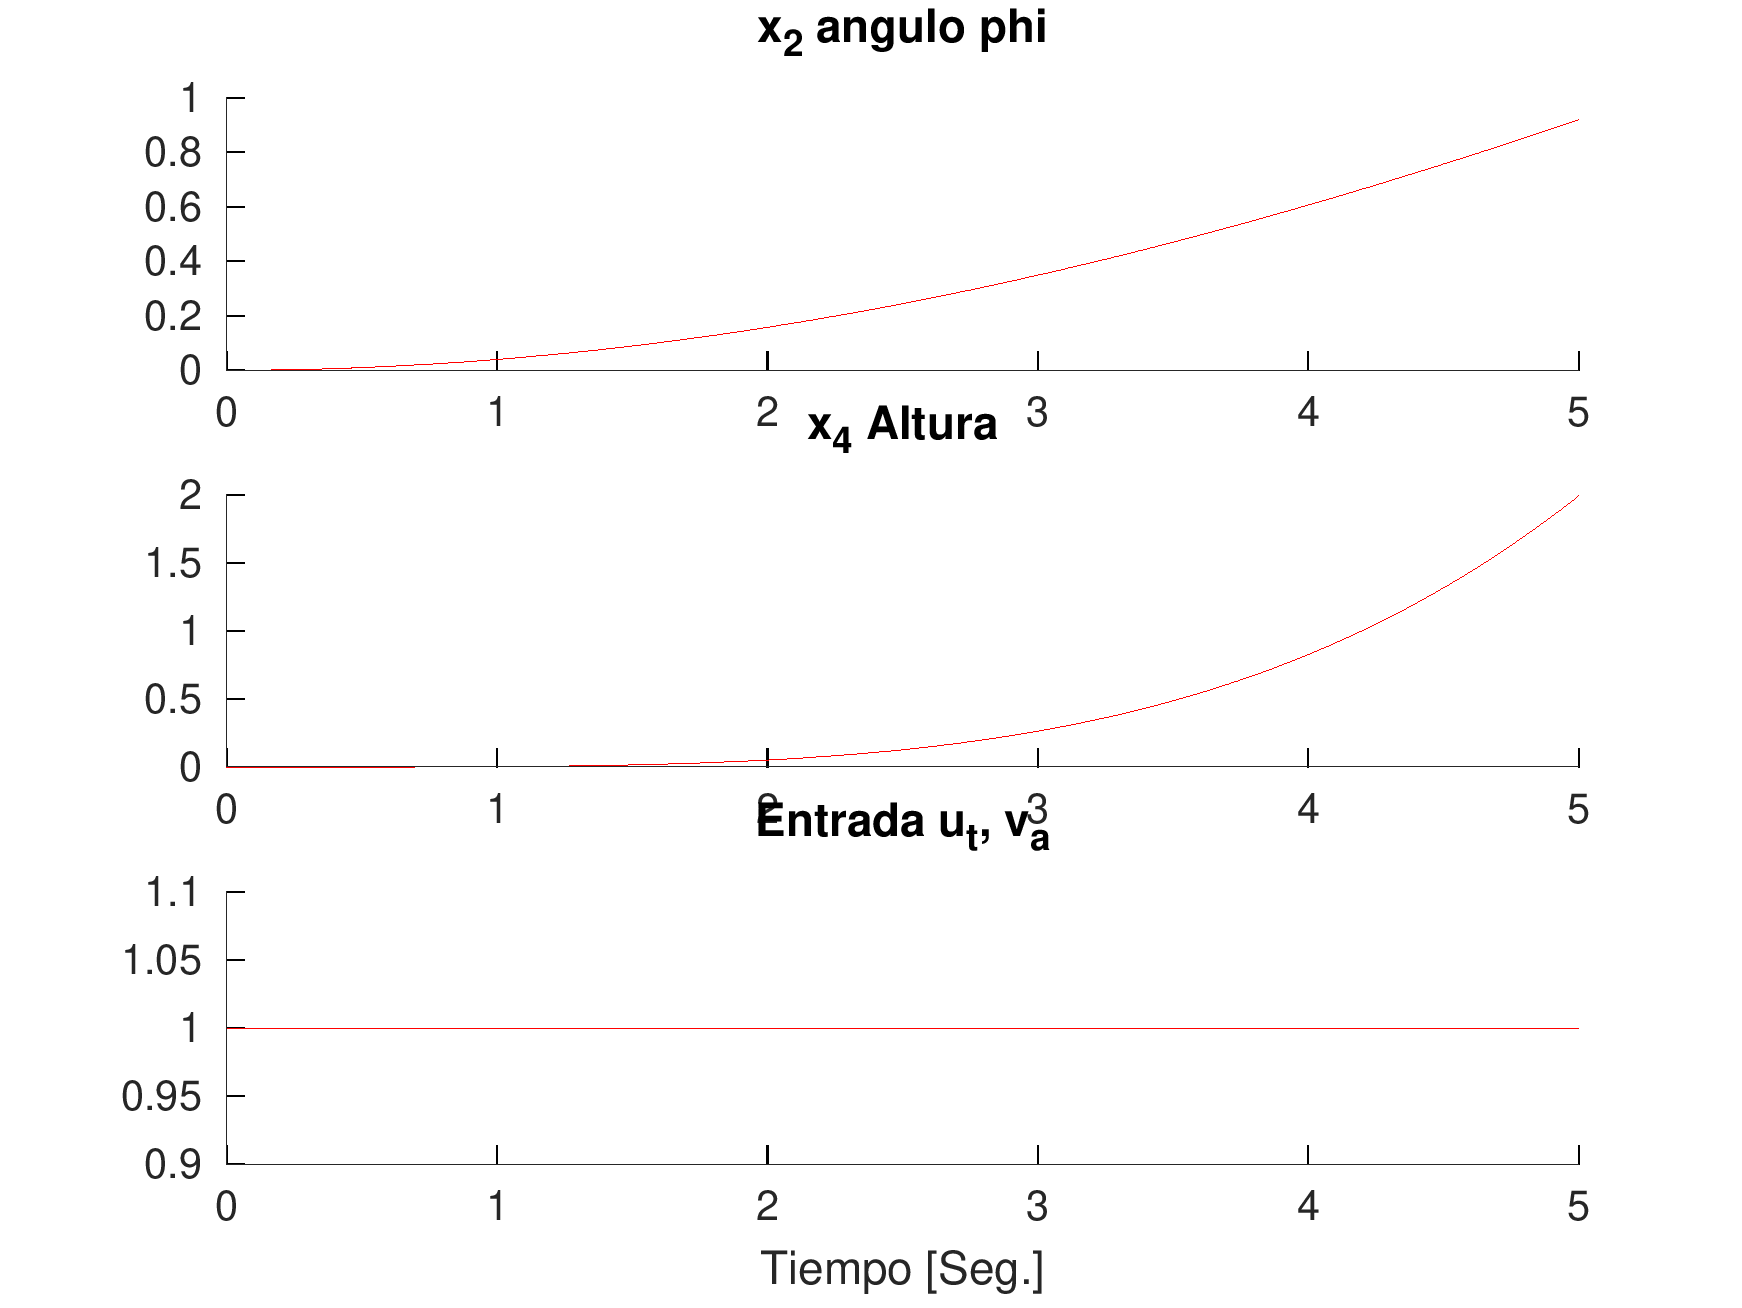

In [14]:
from PIL import Image
imt = Image.open("/content/VarsAvion_temporal.png")
imt

##Actividad 3

Considerando que:

$\omega=0.2$, $a=0.01$,$b=2$,$c=50/s$,$Δt=10^{-3}$ y $t_s=20 s$:

In [21]:
%%writefile Avion_Num2.m
clc;clear all;
warning('off','all');
X=-[0; 0;0;0];t_etapa=10e-3;
tF=20;
color_='r';
color='b';

u=1;
ii=0;
for t=0:t_etapa:tF
  ii=ii+1;
  x2(ii)=X(2);%Ángulo fi
  x4(ii)=X(4);%Altura
  X=modavion(t_etapa, X, u);
  acc(ii)=u;
end


t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);hold on;
plot(t,x2,color_);title('x_2 angulo phi'); hold on;
subplot(3,1,2);hold on;
plot(t,x4,color_);title('x_4 Altura');
subplot(3,1,3);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');

print(hfig1,'VarsAvion_temporal2','-r300','-dpng');
save('Verificacion_Num_1Avion2.mat','-v7');

Overwriting Avion_Num2.m


In [22]:
%%writefile modavion.m
%Funcion modelo
function [X]=modavion(t_etapa, xant, accion)
%xant=[alfa,fi,fi_p,h]
a=0.01; b=2; c=50;
omega=0.2;
At=1e-3;
u=accion;

%xant=[alfa,fi,fi_p,h]
alfa=xant(1);
fi=xant(2);
fi_p=xant(3);
h=xant(4);
x=xant;

for ii=1:t_etapa/At
  %xp=A*x+B*u;
  alfa_p=a*(fi-alfa);
  fi_pp=(-omega^2)*(fi-alfa-b*u);
  h_p=c*alfa;
  xp=[alfa_p;fi_p;fi_pp;h_p];
  x=x+xp*At;
  fi_p=xp(2);
  alfa=x(1);
  fi=x(2);
  fi_p=x(3);
  h=x(4);
end
X=[x]; %

Overwriting modavion.m


In [23]:
# -W : no window system
!octave -W Avion_Num2.m
# import scipy.io
# mat = scipy.io.loadmat('/content/Verificacion_Num_1Avion2.mat')

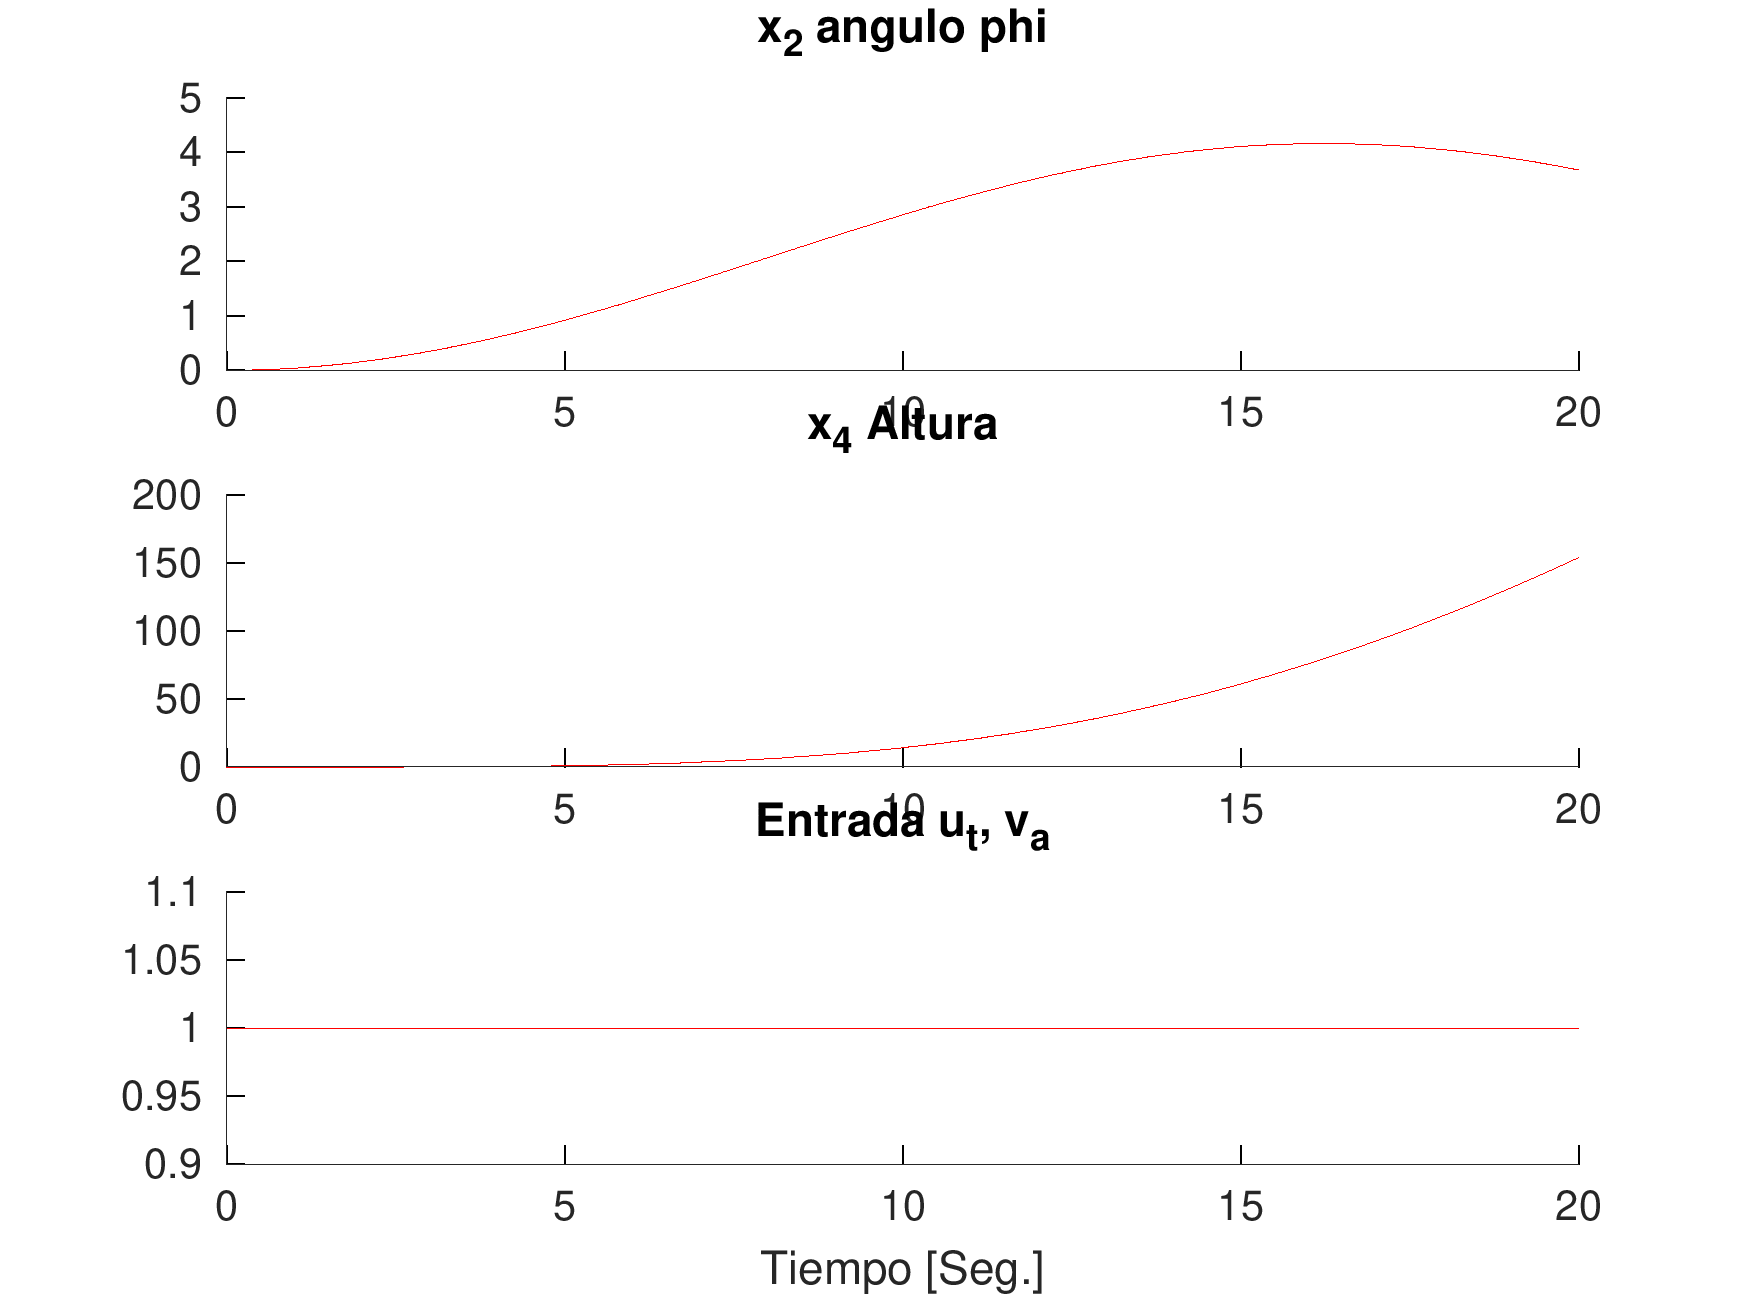

In [24]:
from PIL import Image
imt = Image.open("/content/VarsAvion_temporal2.png")
imt